In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn=pd.read_excel("churn.xlsx")
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
churn['churn'].value_counts()

False.    2850
True.      483
Name: churn, dtype: int64

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
churn             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [5]:
churn.columns[churn.isnull().any()]

Index([], dtype='object')

In [6]:
print("There are {} numeric and {} categorical columns in churn data".format(churn.select_dtypes(include=[np.number]).shape[1],churn.select_dtypes(exclude=[np.number]).shape[1]))

There are 16 numeric and 5 categorical columns in churn data


In [7]:
churn.select_dtypes(exclude=[np.number]).head()

,State,Phone,Int'l Plan,VMail Plan,churn
0,KS,382-4657,no,yes,False.
1,OH,371-7191,no,yes,False.
2,NJ,358-1921,no,no,False.
3,OH,375-9999,yes,no,False.
4,OK,330-6626,yes,no,False.


In [8]:
X=churn.iloc[:,4:20].values
Y=churn.iloc[:, 20].values
X[:, 0], Y[:5]

(array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object),
 array(['False.', 'False.', 'False.', 'False.', 'False.'], dtype=object))

In [9]:
X[16], Y[16]

(array(['no', 'yes', 27, 196.4, 139, 33.39, 280.9, 90, 23.88, 89.3, 75,
        4.02, 13.8, 4, 3.73, 1], dtype=object), 'False.')

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])
labelencoder_X_2 = LabelEncoder()
X[:, 1] = labelencoder_X_2.fit_transform(X[:, 1])
labelencoder_Y=LabelEncoder()
Y=labelencoder_Y.fit_transform(Y)
X[:, 0], X[:, 1], Y

(array([0, 0, 0, ..., 0, 1, 0], dtype=object),
 array([1, 1, 0, ..., 0, 0, 1], dtype=object),
 array([0, 0, 0, ..., 0, 0, 0]))

In [11]:
X[10], Y[10]

(array([0, 0, 0, 129.1, 137, 21.95, 228.5, 83, 19.42, 208.8, 111, 9.4,
        12.7, 6, 3.43, 4], dtype=object), 1)

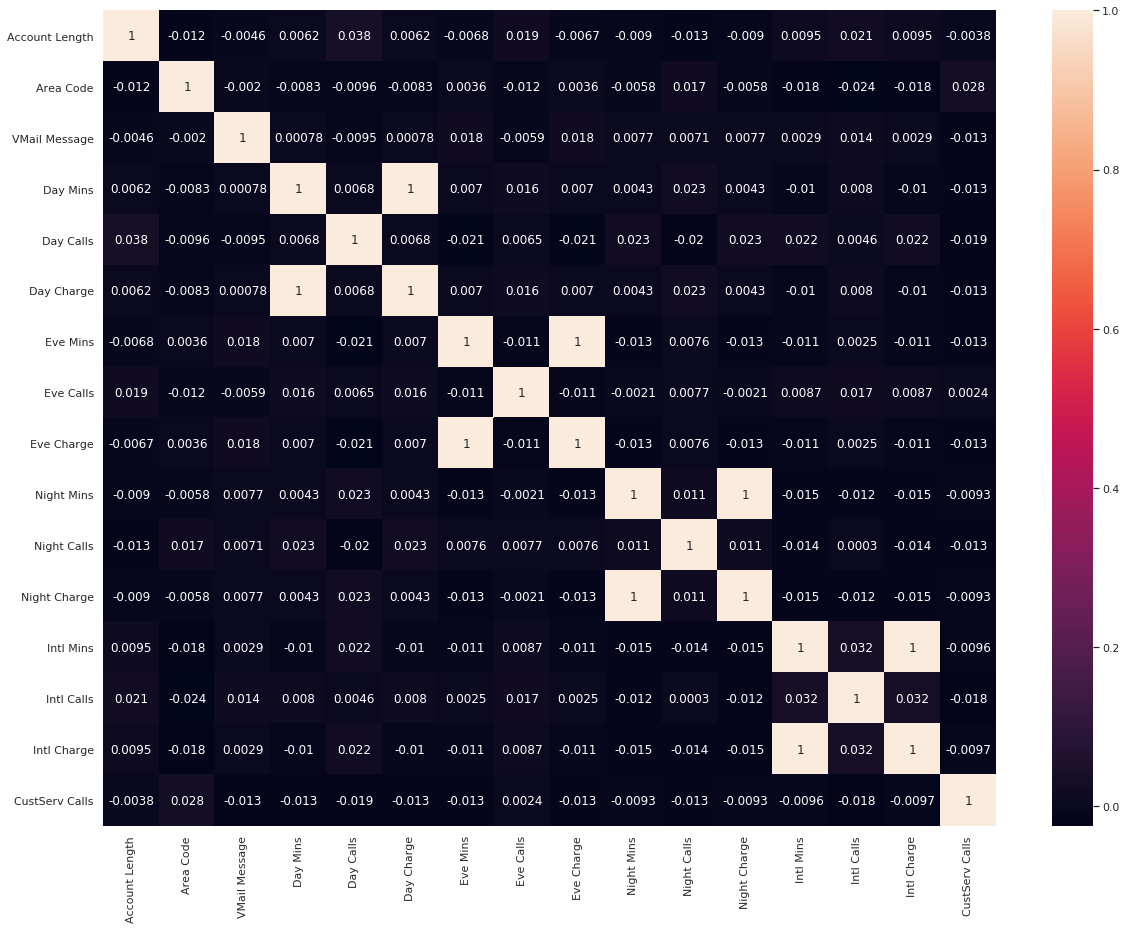

In [12]:
sns.set(rc={'figure.figsize':(20,15)})
cor=churn.corr()
sns.heatmap(cor, annot=True)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X[10]

array([-0.32758048, -0.61839626, -0.59175986, -0.93051461,  1.82219789,
       -0.93025113,  0.54272717, -0.85916786,  0.54209937,  0.15678365,
        0.55670403,  0.15850147,  0.88224117,  0.61789834,  0.88291665,
        1.8529274 ])

In [20]:
#importing labrararies for Artifical Neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [21]:
clf=Sequential()

In [22]:
#adding layers to ANN
clf.add(Dense(units=24,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001),input_dim=16))

#adding two more hidden layer to ANN
clf.add(Dense(units=24,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dense(units=24,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))

#adding output layer
clf.add(Dense(units=1,activation="sigmoid",kernel_initializer="uniform"))

#compiling ANN
clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [23]:
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_10 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_11 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 25        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = clf.fit(X,Y,batch_size=20,epochs=250)
clf.save('model.h5')


Epoch 1/250
3333/3333 [==============================] - 2s 661us/step - loss: 0.4777 - acc: 0.8530
Epoch 2/250
3333/3333 [==============================] - 1s 216us/step - loss: 0.3386 - acc: 0.8551
Epoch 3/250
3333/3333 [==============================] - 1s 228us/step - loss: 0.3323 - acc: 0.8551
Epoch 4/250
3333/3333 [==============================] - 1s 267us/step - loss: 0.3290 - acc: 0.8551
Epoch 5/250
3333/3333 [==============================] - 1s 224us/step - loss: 0.3268 - acc: 0.8551
Epoch 6/250
3333/3333 [==============================] - 1s 233us/step - loss: 0.3246 - acc: 0.8551
Epoch 7/250
3333/3333 [==============================] - 1s 225us/step - loss: 0.3229 - acc: 0.8551
Epoch 8/250
3333/3333 [==============================] - 1s 241us/step - loss: 0.3231 - acc: 0.8623
Epoch 9/250
3333/3333 [==============================] - 1s 244us/step - loss: 0.3219 - acc: 0.8707
Epoch 10/250
3333/3333 [==============================] - 1s 227us/step - loss: 0.3206 - acc: 0.870

3333/3333 [==============================] - 1s 204us/step - loss: 0.3070 - acc: 0.8818
Epoch 81/250
3333/3333 [==============================] - 1s 206us/step - loss: 0.3058 - acc: 0.8842
Epoch 82/250
3333/3333 [==============================] - 1s 210us/step - loss: 0.3063 - acc: 0.8839
Epoch 83/250
3333/3333 [==============================] - 1s 227us/step - loss: 0.3066 - acc: 0.8839
Epoch 84/250
3333/3333 [==============================] - 1s 200us/step - loss: 0.3052 - acc: 0.8833
Epoch 85/250
3333/3333 [==============================] - 1s 220us/step - loss: 0.3051 - acc: 0.8848
Epoch 86/250
3333/3333 [==============================] - 1s 220us/step - loss: 0.3057 - acc: 0.8905
Epoch 87/250
3333/3333 [==============================] - 1s 230us/step - loss: 0.3063 - acc: 0.8845
Epoch 88/250
3333/3333 [==============================] - 1s 197us/step - loss: 0.3058 - acc: 0.8851
Epoch 89/250
3333/3333 [==============================] - 1s 281us/step - loss: 0.3048 - acc: 0.8836
Epo

3333/3333 [==============================] - 1s 190us/step - loss: 0.2027 - acc: 0.9454
Epoch 161/250
3333/3333 [==============================] - 1s 187us/step - loss: 0.1995 - acc: 0.9490
Epoch 162/250
3333/3333 [==============================] - 1s 205us/step - loss: 0.2014 - acc: 0.9451
Epoch 163/250
3333/3333 [==============================] - 1s 202us/step - loss: 0.1977 - acc: 0.9460
Epoch 164/250
3333/3333 [==============================] - 1s 225us/step - loss: 0.2005 - acc: 0.9436
Epoch 165/250
3333/3333 [==============================] - 1s 214us/step - loss: 0.2006 - acc: 0.9463
Epoch 166/250
3333/3333 [==============================] - 1s 215us/step - loss: 0.2001 - acc: 0.9433
Epoch 167/250
3333/3333 [==============================] - 1s 220us/step - loss: 0.1998 - acc: 0.9478
Epoch 168/250
3333/3333 [==============================] - 1s 227us/step - loss: 0.1982 - acc: 0.9457
Epoch 169/250
3333/3333 [==============================] - 1s 226us/step - loss: 0.1992 - acc: 0

3333/3333 [==============================] - 1s 278us/step - loss: 0.1670 - acc: 0.9544
Epoch 241/250
3333/3333 [==============================] - 1s 212us/step - loss: 0.1642 - acc: 0.9571
Epoch 242/250
3333/3333 [==============================] - 1s 227us/step - loss: 0.1663 - acc: 0.9562
Epoch 243/250
3333/3333 [==============================] - 1s 225us/step - loss: 0.1654 - acc: 0.9556
Epoch 244/250
3333/3333 [==============================] - 1s 219us/step - loss: 0.1677 - acc: 0.9544
Epoch 245/250
3333/3333 [==============================] - 1s 220us/step - loss: 0.1644 - acc: 0.9571
Epoch 246/250
3333/3333 [==============================] - 1s 234us/step - loss: 0.1632 - acc: 0.9586
Epoch 247/250
3333/3333 [==============================] - 1s 225us/step - loss: 0.1670 - acc: 0.9544
Epoch 248/250
3333/3333 [==============================] - 1s 206us/step - loss: 0.1618 - acc: 0.9592
Epoch 249/250
3333/3333 [==============================] - 1s 213us/step - loss: 0.1662 - acc: 0

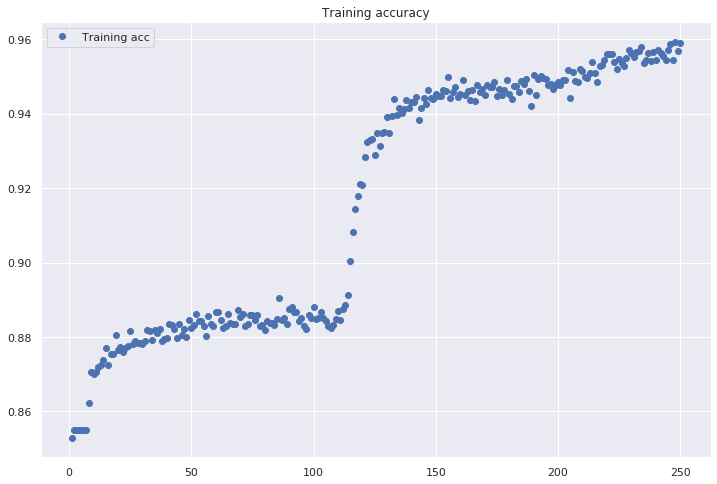

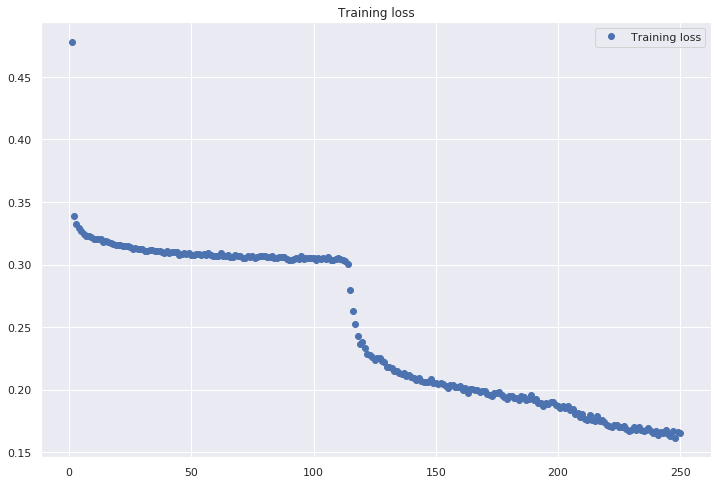

In [25]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12,8))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [32]:
from sklearn.externals.joblib import dump, load
dump(sc, 'std_scalar.bin')

['std_scalar.bin']

In [132]:
sc = load('std_scalar.bin')
sc

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
new_pred = np.array([['no', 'no', 0, 332.9, 67, 56.59, 317.8, 97, 27.01, 160.6, 128,
        7.23, 5.4, 9, 1.46, 4],['no', 'yes', 27, 196.4, 139, 33.39, 280.9, 90, 23.88, 89.3, 75,
        4.02, 13.8, 4, 3.73, 1]])

new_pred[:, 0] = labelencoder_X_1.fit_transform(new_pred[:, 0])
new_pred[:, 1] = labelencoder_X_2.fit_transform(new_pred[:, 1])
new_pred

array([['0', '0', '0', '332.9', '67', '56.59', '317.8', '97', '27.01',
        '160.6', '128', '7.23', '5.4', '9', '1.46', '4'],
       ['0', '1', '27', '196.4', '139', '33.39', '280.9', '90', '23.88',
        '89.3', '75', '4.02', '13.8', '4', '3.73', '1']], dtype='<U5')

In [27]:
new_pred = sc.transform(new_pred)
new_pred

array([[-0.32758048, -0.61839626, -0.59175986,  2.81173526, -1.66627735,
         2.81135938,  2.30385178, -0.15634379,  2.3031117 , -0.79642112,
         1.42557266, -0.79512194, -1.73291462,  1.83699177, -1.73099578,
         1.8529274 ],
       [-0.32758048,  1.6170861 ,  1.38101414,  0.30527252,  1.92186861,
         0.30543086,  1.57613063, -0.50775583,  1.57689713, -2.20645225,
        -1.28325308, -2.20578144,  1.27630574, -0.19483061,  1.28097438,
        -0.42793202]])

In [28]:
from keras.models import load_model
model = load_model('model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_10 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_11 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 25        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [30]:
pred = model.predict(new_pred)
pred = pred > 0.5
pred

array([[ True],
       [False]])